In [5]:
import geopy
import pandas as pd


In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="google")
location = geolocator.reverse("52.509669, 13.376294")
location

Location(Steinecke, Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland, (52.5098134, 13.37631790998454, 0.0))

In [28]:
df = pd.read_csv("c:/users/media/test_file.csv")



In [29]:
df = pd.read_csv("c:/users/media/Union_bank_address_nig.csv")

df.head(4)

,Index,STATE,ORGANIZATIONNAME,CUSTOMERNAME,ADDRESSLINE,BRANCH,FIELDWORKER,LATITUDE,LONGITUDE,Coordinates,Nearest Bus Stop,Landmark,Area Profile,Color of Building,Type of Building,Verification Message,Gender,CUSTOMER'S RELATIONSHIP WITH ADDRESS
0,0,lekki,UNION LAG _C,SAULA SAMIAT ADEBIMPE,48 OSHODI STR ADENIJI LAGOS OSHODI STR ADENIJI...,LAGOS,Rufus Omowaiye,6.455930,3.398445,"6.4559302, 3.3984452999999997",Adeniji Adele/Idumota,Bet9ja,High,Green,Storey Building,Address Exist And Customer Is Known,Female,Tenant
1,1,kwara,24_9_UNION_TJ,ABUBAKAR MOHAMMED,ABUBAKAR IDRIS YAHAYA HSE CLOSE TO RANI NDAKO ...,LAFIAGI,Okereke Abthony Onahi,8.852528,5.404427,"8.8525279, 5.4044267999999995",Iya-wa b/stop,Mosque,High,White,Semi-Detached,Address Exist And Customer Is Known,Male,Landlord
2,2,lagos,C AND S,BIOKOU DAMILOLA ABRAHAM,101 ILAJE ROAD BARIGA LAGOS,BARIGA,Chime Awele Esther,6.531639,3.394660,"6.5316388, 3.3946601",Ilaje bustop,Rccg,Low,Blue,Bungalow,Address Exist And Customer Is Known,Male,Tenant
3,3,lagos,POLARIS,AY,RETURN NOW,Polaris,Ayomide Akanle,6.529545,3.364129,"6.5295451, 3.3641294000000004",F,F,High,F,Bungalow,Address Exist But Customer Is Not Known,Male,Tenant


In [30]:
df = df["Coordinates"]

In [31]:
df.head(4)

0    6.4559302, 3.3984452999999997
1    8.8525279, 5.4044267999999995
2             6.5316388, 3.3946601
3    6.5295451, 3.3641294000000004
Name: Coordinates, dtype: object

In [33]:
for i in df:
    j=0
    print (i)
    j+=1

6.4559302, 3.3984452999999997
8.8525279, 5.4044267999999995
6.5316388, 3.3946601
6.5295451, 3.3641294000000004
12.979542172159242, 7.626522369682788
6.561326, 3.3726035
6.6635722, 3.3218225
6.5406719, 3.3841683
6.4833286, 3.1946174999999997
6.473295600000001, 3.8064131999999997
6.609396648613149, 3.3879384398460393
6.6198032, 3.3293026
5.9034531, 5.6543356
6.4714852, 3.3380572
6.4533452, 3.4000396000000004
6.463985055165944, 3.293138779699802
6.53569, 3.3866367
6.5449826, 3.2763081
6.534955871757152, 3.386890701949596
11.530795428319124, 7.319562658667564
6.6131976, 3.3231237
6.6717201, 3.3174667
6.6799624, 3.3028487
6.549663917632839, 3.251405954360962
5.534271112746482, 5.764423236250877
6.6240067, 3.312294
6.6704211, 3.33056
6.6512837, 3.3280714
6.6516528, 3.271173
6.468839616646496, 3.3659258857369423
6.447333542114598, 3.339260034263134
6.452759619477716, 3.3319580554962154
6.621825838027583, 3.3925927430391316
6.6224227, 3.3606198
6.6224227, 3.3606198
6.5329274, 3.3926874
9.90301

In [26]:
from geopy.geocoders import Nominatim

def geolate (i)
geolocator = Nominatim(user_agent="google")
    location = geolocator.reverse(i)
    print(location)

SyntaxError: expected ':' (1247484584.py, line 3)

In [59]:
import csv
from geopy.geocoders import Nominatim
from tqdm import tqdm

def geocode_coordinates(input_file,output_file):
    # Create a new geocoder object
    geolocator = Nominatim(user_agent="google")

    # Open the CSV file
    with open(input_file, "r") as f:
        # Read the CSV file as a dictionary
        reader = csv.DictReader(f)
        # Create a list to store the modified rows
        rows = []
        # Iterate over the rows in the CSV file
        for row in reader:
#         for row in tqdm(reader, total=sum(1 for _ in f)):
            # Get the latitude and longitude from the row
            latitude = row["latitude"]
            longitude = row["longitude"]
            Customer = row["CUSTOMERNAME"]
            # Use the geocoder to get the address for the coordinates
            location = geolocator.reverse((latitude, longitude))
            print(Customer+":" +location.address)
            # Add the address to the row
            row["address"] = location.address
            # Add the modified row to the list
            rows.append(row)

    # Open the CSV file in write mode
    with open(output_file, "w", newline="") as f:
        # Write the modified rows to the CSV file
        fieldnames = ["latitude", "longitude", "address","CUSTOMER'S RELATIONSHIP WITH ADDRESS", 'Type of Building', 
                      'Coordinates', 'Verification Message', 'Color of Building', 'ADDRESSLINE', 'ORGANIZATIONNAME',
                      'Area Profile', 'Gender', 
                      'Nearest Bus Stop', 'CUSTOMERNAME', 'ď»żIndex', 'STATE', 'Landmark', 'FIELDWORKER', 'BRANCH']
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)
        print("Your file is ready")

# Call the function to geocode the coordinates in the CSV file
geocode_coordinates("Union_bank_address_nig.csv","Union_bank_address_Nig_result.csv")



SAULA SAMIAT ADEBIMPE:Oshodi Street, Lagos, Lagos Island, Lagos, 100242, Nigeria
ABUBAKAR MOHAMMED:Lafiagi, Edu, Kwara, Nigeria
BIOKOU DAMILOLA ABRAHAM:Ilaje Road, Bariga, Abule Ijesha, Shomolu, Lagos, 100231, Nigeria
AY:Tinubu, Idi Oro, Mushin, Lagos, 100231, Nigeria
ISAH BELLO:F219, Kudu 2, Muhammadu Dikko Stadium, Katsina, Nigeria
ADENIRAN WONUOLA AYOMIKUN:Saji Ayangade Street, Maryland, Kosofe, Lagos, 100271, Nigeria
MUHAMMED HABEEB ABIOLA:Iju Junction, Ifako/Ijaye, Lagos, 100314, Nigeria
ORONKOLA OMOBOLAJI ANDRE OLUYEMISI:Adewunmi Street, Somolu, Shomolu, Lagos, 100231, Nigeria
CHIMEZIRI ASIKHAME CLEMENT:Ojo, Lagos, Nigeria
ADEDEJI TIMOTHY TUNDE:Igando Oloja, Ibeju Lekki, Lagos, 105101, Nigeria
OKPAKO JAMES:Orisigun, Shangisha, Kosofe, Lagos, 100247, Nigeria
UKWUEZE RICHARD UGONNA:Anuoluwapo Street, Agege, Lagos, 100282, Nigeria
OGHENERUEMU MARY:Sapele, Delta, Nigeria
INNOCENT DEMION CHUKWUDI:Aiyetoro, Ajeromi/Ifelodun, Lagos, 101212, Nigeria
JUBRIL TAOFEEK ADEWALE:Dumaresque Stre

EZE CYNTHIA CHIDINMA:Onwe Road, Abakaliki, Ebonyi, Nigeria
SALISU MOHAMMED:Nayinawa, Ngelzarma, Yobe, Nigeria
ADEDO AYOBAMI OLUWATIMILEHIN:Makajuola Street, Ekoro, Alimosho, Lagos, 100314, Nigeria
OKWUOSA PASCAL NKEMAKOLAM:Northwest, Lekki-Epe Expressway, Ikota, Eti Osa, Lagos, 105102, Nigeria
OLANREWAJU PENIEL TEMILOLUWA:Olosun, Akinyele, Oyo, Nigeria
NWOSU KOSISOCHUKWU STELLA:Olosun, Akinyele, Oyo, Nigeria
EHICHIOYA KINGSLEY:Majidun Junior Grammar School, F270, Ìkòròdú, Lagos, 104102, Nigeria
ORLAADE GODWIN:Markurdi, Benue, Nigeria
SHOREMEKUN ARNOLD OLUWAFIIREKANMI:Eti Osa, Lagos, 105102, Nigeria
NWOSU KOSISOCHUKWU STELLA:Egbe, Alimosho, Lagos, 100265, Nigeria
SALIHU ABUBAKAR ABDULLAHI:Maya Belwa, Mayo-Belwa, Adamawa, Nigeria
OGUNKUNLE MOSES DARE:Ijegun, Alimosho, Lagos, 100266, Nigeria
ADEYELU IFEOLUWAKINTAN DAVID:Festac Town, Amuwo Odofin, Lagos, 102102, Nigeria
IKE LOTANNA DAVID:Kujore Street, Maryland, Opamore, Kosofe, Lagos, 100271, Nigeria
MADUEMEZIA CHUKWUDI KINGSLEY:Festac To

KeyboardInterrupt: 

In [66]:
import geopandas
import matplotlib as plt

In [119]:
df = pd.read_csv("c:/users/media/Union_bank_address_nig.csv")

# df_temp = df['Verification Message']
# df_temp.head(5)

# df_temp= df_temp.drop_duplicates(subset=['Verification Message'])
# df_temp

# # df_distinct = df.drop_duplicates(subset=['Verification Message'])
# # df_distinct



# df.head(4)
# df = df["Verification Message"] == 'Address Exist And Customer Is Known'

df_known_cust = df.loc[df['Verification Message'] == 'Address Exist And Customer Is Known']

df_not_known_cust = df.loc[df['Verification Message'] == 'Address Exist But Customer Is Not Known']

In [120]:
df.head(5)



,Index,STATE,ORGANIZATIONNAME,CUSTOMERNAME,ADDRESSLINE,BRANCH,FIELDWORKER,latitude,longitude,Coordinates,Nearest Bus Stop,Landmark,Area Profile,Color of Building,Type of Building,Verification Message,Gender,CUSTOMER'S RELATIONSHIP WITH ADDRESS
0,0,lekki,UNION LAG _C,SAULA SAMIAT ADEBIMPE,48 OSHODI STR ADENIJI LAGOS OSHODI STR ADENIJI...,LAGOS,Rufus Omowaiye,6.455930,3.398445,"6.4559302, 3.3984452999999997",Adeniji Adele/Idumota,Bet9ja,High,Green,Storey Building,Address Exist And Customer Is Known,Female,Tenant
1,1,kwara,24_9_UNION_TJ,ABUBAKAR MOHAMMED,ABUBAKAR IDRIS YAHAYA HSE CLOSE TO RANI NDAKO ...,LAFIAGI,Okereke Abthony Onahi,8.852528,5.404427,"8.8525279, 5.4044267999999995",Iya-wa b/stop,Mosque,High,White,Semi-Detached,Address Exist And Customer Is Known,Male,Landlord
2,2,lagos,C AND S,BIOKOU DAMILOLA ABRAHAM,101 ILAJE ROAD BARIGA LAGOS,BARIGA,Chime Awele Esther,6.531639,3.394660,"6.5316388, 3.3946601",Ilaje bustop,Rccg,Low,Blue,Bungalow,Address Exist And Customer Is Known,Male,Tenant
3,3,lagos,POLARIS,AY,RETURN NOW,Polaris,Ayomide Akanle,6.529545,3.364129,"6.5295451, 3.3641294000000004",F,F,High,F,Bungalow,Address Exist But Customer Is Not Known,Male,Tenant
4,4,katsina,24_9_UNION_TJ,ISAH BELLO,21 KADARKO ESTATE MARIAMOH AJIRI KATSINA KATSINA,MARIA PAUL,Okpanachi Maria Josephine,12.979542,7.626522,"12.979542172159242, 7.626522369682788",Kadarko Estate Junction,Sally Restaurant And Cus,High,Blue,Block of Flats,Address Exist And Customer Is Known,Male,Tenant


In [122]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))


gdf_known_cust = geopandas.GeoDataFrame(
    df_known_cust, geometry=geopandas.points_from_xy(df_known_cust.longitude, df_known_cust.latitude))



df_not_known_cust = geopandas.GeoDataFrame(
    df_not_known_cust, geometry=geopandas.points_from_xy(df_not_known_cust.longitude, df_not_known_cust.latitude))

C:\Users\media\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


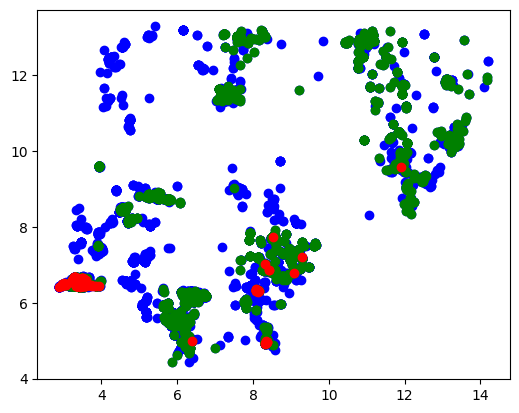

In [125]:
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Nigeria'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='blue')
gdf.total_bounds


gdf_known_cust.plot(ax=ax, color='green')
gdf_known_cust.total_bounds


df_not_known_cust.plot(ax=ax, color='red')
df_not_known_cust.total_bounds


plt.show()


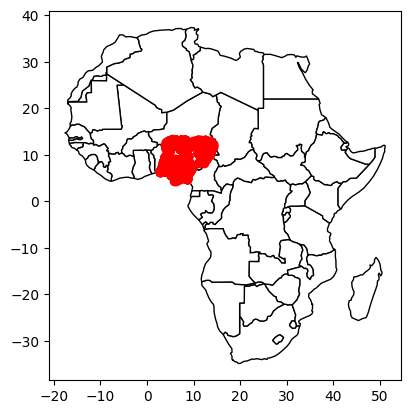

In [105]:
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
gdf.total_bounds

plt.show()